## In this notebook, we implement stochastic gradient descent in a simple linear regression example

In brief, stochastic gradient descent is the usual gradient descent with stochastic mini-batches.

In [1]:
%matplotlib inline
from fastai.basics import *

First, let's create some data...

In [2]:
n = 100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.1864,  1.0000],
        [ 0.8219,  1.0000],
        [-0.5569,  1.0000],
        [ 0.4325,  1.0000],
        [-0.1838,  1.0000]])

In [4]:
## define the coefficients y = x dot a
a = tensor(3., 2.)

In [5]:
## indeed, we compute y accordingly with some added random noise
y = x@a + torch.rand(n)

So the data looks something like this:

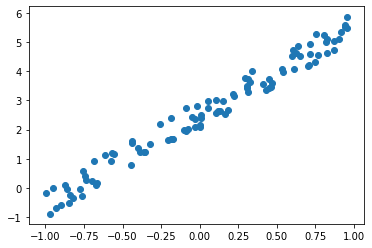

In [8]:
plt.scatter(x[:,0], y)

### we now seek to fit the 2 parameters 'a' so as to minimize the error between the actual points and the model, x@a where a is to be found.

For the regression problem, we can use the loss function as the Mean Squared Error.

In [9]:
def mse(y_hat, y):
    '''
    mean squared error
    '''
    return ((y_hat - y) ** 2).mean()

e.g. had we predicted the parameters a to be -1, 1, our predicted points would look something like so..

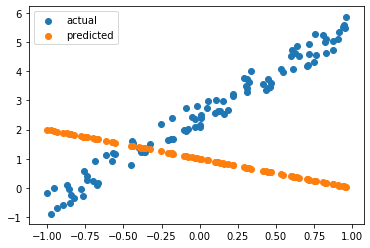

In [12]:
a_hat = tensor(-1.,1.)
y_hat = x@a_hat
plt.scatter(x[:,0], y,  label='actual')
plt.scatter(x[:,0], y_hat,  label='predicted')
plt.legend()

### we can now outline the optimizing process to find best fit parameters 'a'

In [16]:
a_hat = nn.Parameter(a_hat); a_search

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [19]:
def update():
    ## we can modify the code here
    ## to compute on a random subset of indices -> mini-batch
    y_hat = x@a_hat
    loss = mse(y_hat, y)
    if t % 10 == 0: print(loss)
    ## compute gradients
    loss.backward()
    
    ## while not computing gradients, update the parameters
    with torch.no_grad():
        a_hat.sub_(lr * a_hat.grad) # subtract by the updating term
        a_hat.grad.zero_() # reset grad to 0

In [20]:
lr = 1e-1
for t in range(100): update()

tensor(8.2874, grad_fn=<MeanBackward0>)
tensor(1.2170, grad_fn=<MeanBackward0>)
tensor(0.3653, grad_fn=<MeanBackward0>)
tensor(0.1585, grad_fn=<MeanBackward0>)
tensor(0.1072, grad_fn=<MeanBackward0>)
tensor(0.0945, grad_fn=<MeanBackward0>)
tensor(0.0914, grad_fn=<MeanBackward0>)
tensor(0.0906, grad_fn=<MeanBackward0>)
tensor(0.0904, grad_fn=<MeanBackward0>)
tensor(0.0904, grad_fn=<MeanBackward0>)


#### some fancy animation

In [26]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [28]:
a_hat = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a_hat.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)

Pretty cool!